# Visuels et exploration sur la premiere donnée

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd

## Sur la donnée de 2015 :

### Explorons la donnée

In [3]:
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [4]:
nRowsRead = None
df_2015 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 1/data/2015.csv', delimiter=',', nrows = nRowsRead)
df_2015.dataframeName = '2015.csv'

In [5]:
nRow, nCol = df_2015.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 158 rows and 12 columns


In [6]:
df_2015.head(100)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
97,Dominican Republic,Latin America and Caribbean,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305
98,Laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799


In [8]:
print(df_2015.max())

Country                                Zimbabwe
Region                           Western Europe
Happiness Rank                              158
Happiness Score                           7.587
Standard Error                          0.13693
Economy (GDP per Capita)                1.69042
Family                                  1.40223
Health (Life Expectancy)                1.02525
Freedom                                 0.66973
Trust (Government Corruption)           0.55191
Generosity                              0.79588
Dystopia Residual                       3.60214
dtype: object


In [9]:
print(df_2015.min())

Country                                        Afghanistan
Region                           Australia and New Zealand
Happiness Rank                                           1
Happiness Score                                      2.839
Standard Error                                     0.01848
Economy (GDP per Capita)                               0.0
Family                                                 0.0
Health (Life Expectancy)                               0.0
Freedom                                                0.0
Trust (Government Corruption)                          0.0
Generosity                                             0.0
Dystopia Residual                                  0.32858
dtype: object


In [10]:
print(df_2015.median())

Happiness Rank                   79.500000
Happiness Score                   5.232500
Standard Error                    0.043940
Economy (GDP per Capita)          0.910245
Family                            1.029510
Health (Life Expectancy)          0.696705
Freedom                           0.435515
Trust (Government Corruption)     0.107220
Generosity                        0.216130
Dystopia Residual                 2.095415
dtype: float64


/tmp/ipykernel_715/4207357824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_2015.median())


### Créons des visuels

In [11]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [12]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matrice de corrélation pour 2015', fontsize=15)
    plt.show()

In [13]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [14]:
df_2015.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


/tmp/ipykernel_715/844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


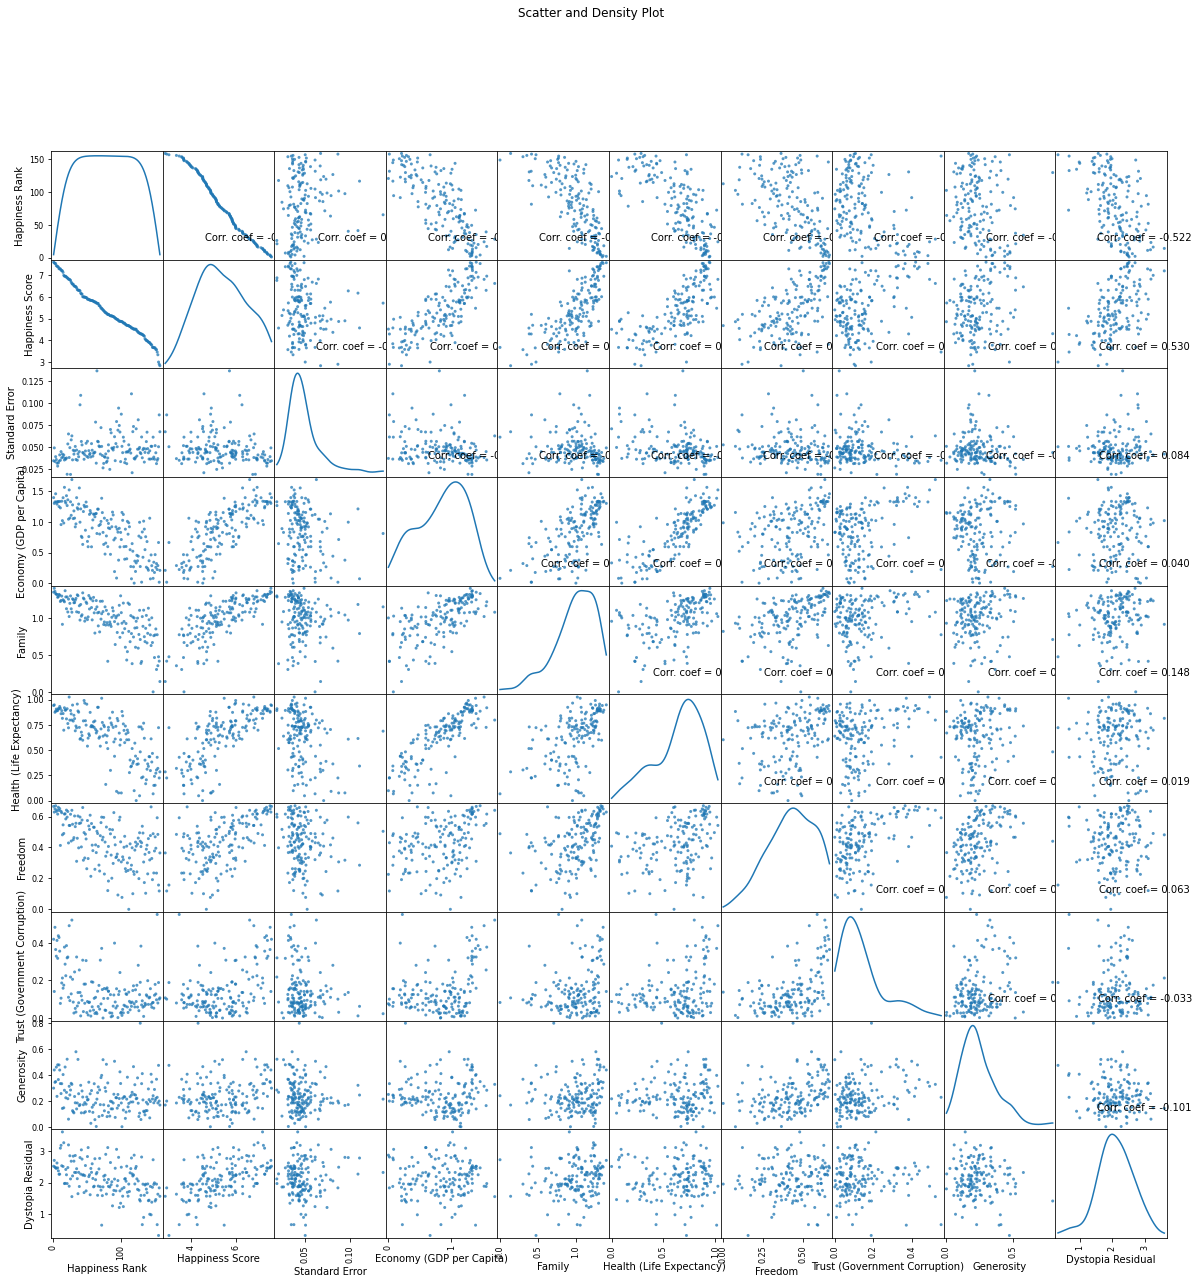

In [15]:
plotScatterMatrix(df_2015, 20, 10)

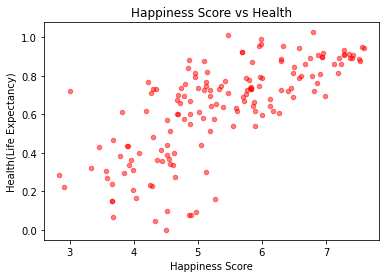

In [16]:
df_2015.plot(kind= "scatter",x="Happiness Score",y="Health (Life Expectancy)",color="red",alpha = .5 )
plt.xlabel("Happiness Score")
plt.ylabel("Health(Life Expectancy)")
plt.title("Happiness Score vs Health")
plt.show()

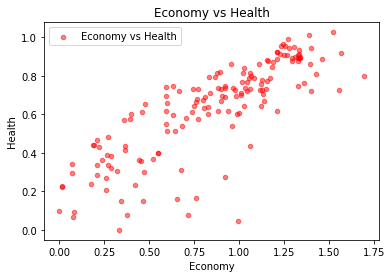

In [17]:
df_2015.plot(kind='scatter',x='Economy (GDP per Capita)',y='Health (Life Expectancy)',color='red',alpha=.5,label="Economy vs Health")
plt.xlabel("Economy")
plt.ylabel("Health")
plt.title("Economy vs Health")
plt.show()

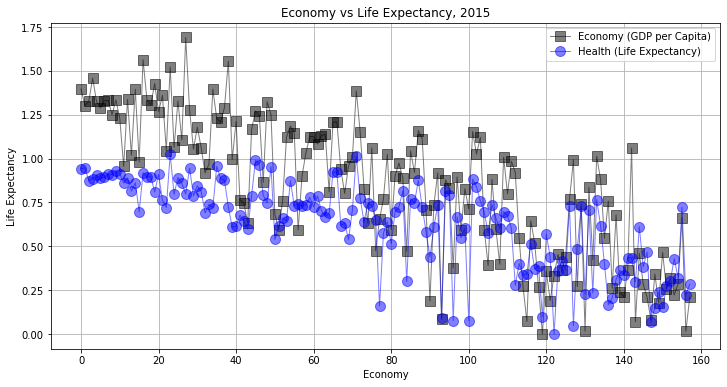

In [18]:
df_2015['Economy (GDP per Capita)'].plot(kind = "line", color = "black",label = "Economy (GDP per Capita)",linewidth = 1, alpha = 0.5, grid = True,figsize=(10,6), marker='s', ms=10)
df_2015['Health (Life Expectancy)'].plot( color = "blue",label = "Health (Life Expectancy)",linewidth = 1, alpha = 0.5, grid = True,figsize=(12,6), marker='o', ms=10)
plt.legend(loc='upper right')
plt.xlabel('Economy')
plt.ylabel('Life Expectancy')
plt.title('Economy vs Life Expectancy, 2015')
plt.show()

# Visuels et exploration sur la deuxième donnée

In [3]:
nRowsRead = None
df2_2021 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 2/data/world-happiness-report-2021.csv', delimiter=',', nrows = nRowsRead)
df2 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 2/data/world-happiness-report.csv', delimiter=',', nrows = nRowsRead)

In [19]:
regions_dict = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Middle East",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cabo Verde": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo (Brazzaville)": "Africa",
    "Congo (Kinshasa)": "Africa",
    "Costa Rica": "North America",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini (fmr. 'Swaziland')": "Africa",
    "Ethiopia": "Africa",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Holy See": "Europe",
    "Honduras": "North America",
    "Hong Kong S.A.R. of China": "Asia",          # Updated
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Middle East",
    "Iraq": "Middle East",
    "Ireland": "Europe",
    "Israel": "Middle East",
    "Italy": "Europe",
    "Ivory Coast": "Africa",                     # Updated
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Middle East",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Korea, North": "Asia",
    "Korea, South": "Asia",
    "Kosovo": "Europe",
    "Kuwait": "Middle East",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Middle East",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Macedonia": "Europe",
    "Norway": "Europe",
    "Oman": "Middle East",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestinian Territories": "Middle East",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Qatar": "Middle East",
    "Romania": "Europe",
    "Russia": "Europe/Asia",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Middle East",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "Somaliland region": "Africa",               # Updated
    "South Africa": "Africa",
    "South Korea": "Asia",                       # Updated
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Middle East",
    "Taiwan Province of China": "Asia",          # Updated
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Timor-Leste": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe/Asia",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Middle East",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Yemen": "Middle East",
    "Zambia": "Africa",
    "Zimbabwe": "Africa"
}


In [21]:
df2_with_regions = df2
df2_with_regions['Region'] = df2_with_regions['Country name'].map(regions_dict)
countries_with_none_values = df2_with_regions.loc[df2_with_regions['Region'].isna(), 'Country name'].tolist()

In [22]:
df2_with_regions.to_csv('With_Regions.csv', index=False)

In [20]:
df2_2021.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [21]:
df2.head(50)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [22]:
df2_2021.shape

(149, 20)

In [23]:
df2.shape

(1949, 11)

In [24]:
df2.max()

Country name                        Zimbabwe
year                                    2020
Life Ladder                            8.019
Log GDP per capita                    11.648
Social support                         0.987
Healthy life expectancy at birth        77.1
Freedom to make life choices           0.985
Generosity                             0.698
Perceptions of corruption              0.983
Positive affect                        0.944
Negative affect                        0.705
dtype: object

In [25]:
df2.min()

Country name                        Afghanistan
year                                       2005
Life Ladder                               2.375
Log GDP per capita                        6.635
Social support                             0.29
Healthy life expectancy at birth           32.3
Freedom to make life choices              0.258
Generosity                               -0.335
Perceptions of corruption                 0.035
Positive affect                           0.322
Negative affect                           0.083
dtype: object

In [26]:
df_2016 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 1/data/2016.csv', delimiter=',', nrows = nRowsRead)

In [27]:
df_2016.shape

(157, 13)

In [28]:
df_2016.head(30)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [29]:
df_2017 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 1/data/2017.csv', delimiter=',', nrows = nRowsRead)

In [30]:
df_2016.shape

(157, 13)

In [31]:
df_2016.head(30)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [32]:
df_2015.head(30)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [33]:
df_2017 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 1/data/2017.csv', delimiter=',', nrows = nRowsRead)

In [34]:
df_2017.head(30)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [35]:
df_2018 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 1/data/2018.csv', delimiter=',', nrows = nRowsRead)

In [36]:
df_2018.head(30)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [37]:
df_2019 = pd.read_csv('/home/omarobh/code/OBHomar/to_delete/Happiness PFA BI/Data Hapiness 1/data/2019.csv', delimiter=',', nrows = nRowsRead)

In [38]:
df_2019.head(30)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [39]:
df2.shape

(1949, 11)

In [40]:
df2.head(30)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [41]:
df2.max()

Country name                        Zimbabwe
year                                    2020
Life Ladder                            8.019
Log GDP per capita                    11.648
Social support                         0.987
Healthy life expectancy at birth        77.1
Freedom to make life choices           0.985
Generosity                             0.698
Perceptions of corruption              0.983
Positive affect                        0.944
Negative affect                        0.705
dtype: object

In [42]:
df2.min()

Country name                        Afghanistan
year                                       2005
Life Ladder                               2.375
Log GDP per capita                        6.635
Social support                             0.29
Healthy life expectancy at birth           32.3
Freedom to make life choices              0.258
Generosity                               -0.335
Perceptions of corruption                 0.035
Positive affect                           0.322
Negative affect                           0.083
dtype: object

# Répondons aux questions suivantes


## Quels sont les facteurs les plus corrélés linéairement avec le bonheur ?

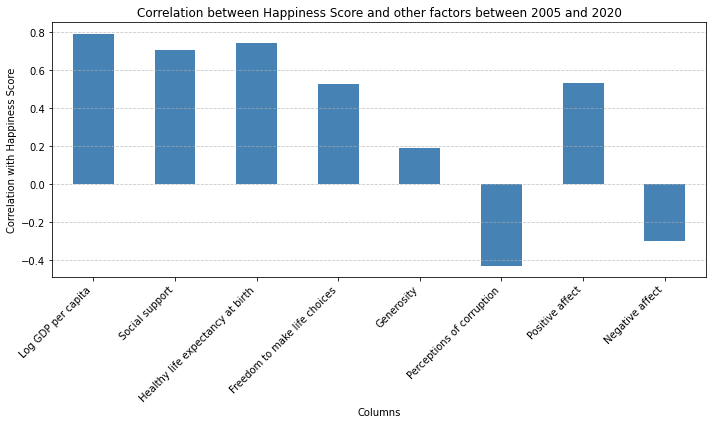

In [43]:
correlations_with_happiness = df2.corr()['Life Ladder']

correlations_with_happiness = correlations_with_happiness.drop('Life Ladder')
correlations_with_happiness = correlations_with_happiness.drop('year')


plt.figure(figsize=(10, 6))
correlations_with_happiness.plot(kind='bar', color='steelblue')
plt.xlabel('Columns')
plt.ylabel('Correlation with Happiness Score')
plt.title('Correlation between Happiness Score and other factors between 2005 and 2020')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


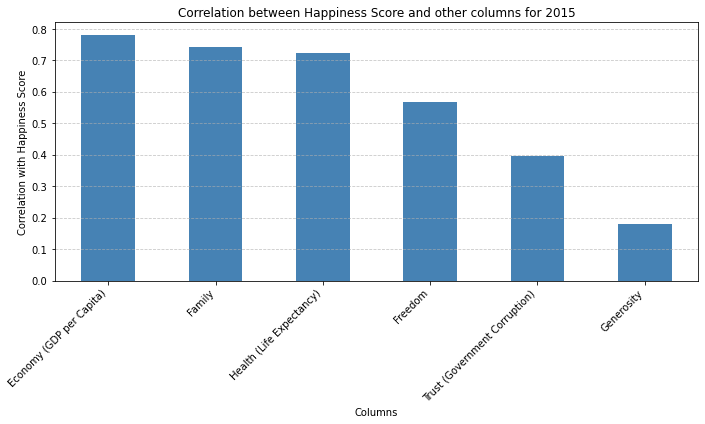

In [44]:
correlations_with_happiness = df_2015.corr()['Happiness Score']

correlations_with_happiness = correlations_with_happiness.drop('Happiness Score')
correlations_with_happiness = correlations_with_happiness.drop('Happiness Rank')
correlations_with_happiness = correlations_with_happiness.drop('Standard Error')
correlations_with_happiness = correlations_with_happiness.drop('Dystopia Residual')

plt.figure(figsize=(10, 6))
correlations_with_happiness.plot(kind='bar', color='steelblue')
plt.xlabel('Columns')
plt.ylabel('Correlation with Happiness Score')
plt.title('Correlation between Happiness Score and other columns for 2015')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_715/3851314135.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


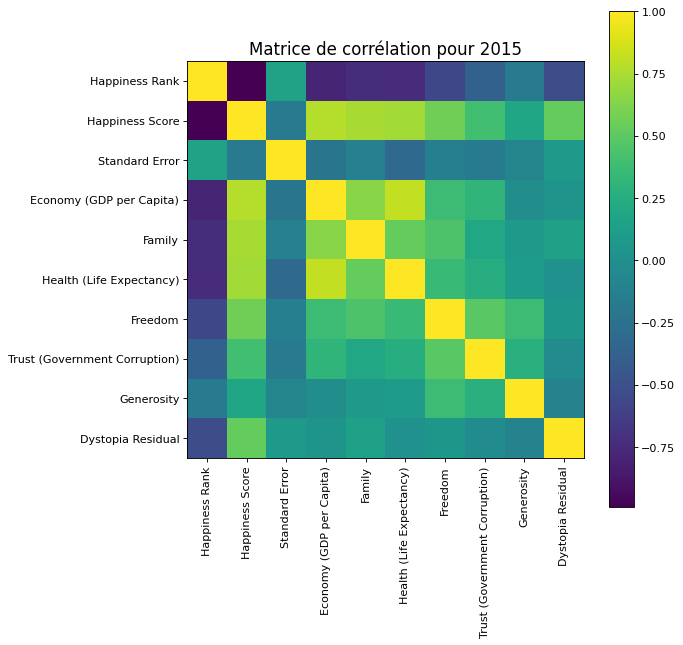

In [45]:
plotCorrelationMatrix(df_2015, 8)

## Quels ont été les années les plus heureuses et les plus tristes entre 2015 et 2021 ?

In [46]:
df_2020 = df2[df2['year'] == 2020]

In [47]:
annees = []

for annee in range(2015, 2022):
    annees.append(annee)

liste_dataframes = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df2_2021]

In [48]:
for dataframe in liste_dataframes:
    print(dataframe.columns)
    print()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       '

In [49]:
Liste_Moyennes_LadderScore = []

df_2015['Happiness Score'].mean()

5.375734177215189

In [50]:
df_2016['Happiness Score'].mean()

5.382184713375795

In [51]:
df_2017['Happiness.Score'].mean()

5.354019355773926

In [52]:
df_2018['Score'].mean()

5.375916666666667

In [53]:
df_2019['Score'].mean()

5.407096153846155

In [54]:
df_2020['Life Ladder'].mean()

5.8405999999999985

In [55]:
df2_2021['Ladder score'].mean()

5.532838926174497

In [56]:
Liste_Moyennes_LadderScore.append(df_2015['Happiness Score'].mean())
Liste_Moyennes_LadderScore.append(df_2016['Happiness Score'].mean())
Liste_Moyennes_LadderScore.append(df_2017['Happiness.Score'].mean())
Liste_Moyennes_LadderScore.append(df_2018['Score'].mean())
Liste_Moyennes_LadderScore.append(df_2019['Score'].mean())
Liste_Moyennes_LadderScore.append(df_2020['Life Ladder'].mean())
Liste_Moyennes_LadderScore.append(df2_2021['Ladder score'].mean())

In [57]:
print(Liste_Moyennes_LadderScore)

[5.375734177215189, 5.382184713375795, 5.354019355773926, 5.375916666666667, 5.407096153846155, 5.8405999999999985, 5.532838926174497]


In [58]:
paires = zip(annees, Liste_Moyennes_LadderScore)
Moyenne_par_annee = dict(paires)

In [59]:
print(Moyenne_par_annee)

{2015: 5.375734177215189, 2016: 5.382184713375795, 2017: 5.354019355773926, 2018: 5.375916666666667, 2019: 5.407096153846155, 2020: 5.8405999999999985, 2021: 5.532838926174497}


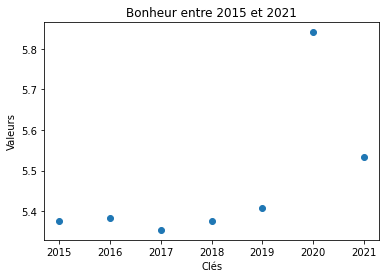

In [60]:
plt.scatter(annees,  Liste_Moyennes_LadderScore)

# Ajouter des étiquettes et des titres
plt.xlabel('Clés')
plt.ylabel('Valeurs')
plt.title('Bonheur entre 2015 et 2021')

# Afficher le plot
plt.show()

## Quel est le pays qui a su le mieux gérer la crise sanitaire du COVID 19 en terme de bonheur de la population (plus grosse hausse au niveau de bonheur entre 2019 et 2020) ?

In [61]:
df_2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [62]:
df_2020.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
51,Argentina,2020,5.901,9.850,0.897,69.2,0.823,-0.122,0.816,0.764,0.342
79,Australia,2020,7.137,10.760,0.937,74.2,0.905,0.210,0.491,0.769,0.205
92,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206
117,Bahrain,2020,6.173,10.620,0.848,69.7,0.945,0.132,NaN,0.790,0.297
132,Bangladesh,2020,5.280,8.472,0.739,65.3,0.777,-0.009,0.742,0.582,0.332
160,Belgium,2020,6.839,10.771,0.904,72.4,0.767,-0.164,0.634,0.647,0.260
174,Benin,2020,4.408,8.102,0.507,55.1,0.783,-0.083,0.532,0.609,0.305
192,Bolivia,2020,5.559,8.998,0.805,64.2,0.877,-0.054,0.868,0.790,0.382
205,Bosnia and Herzegovina,2020,5.516,9.583,0.899,68.4,0.740,0.138,0.916,0.644,0.325


In [63]:
#cherchons les pays en commun recensés entre les deux années 2019 et 2020

liste_pays_2019 = df_2019['Country or region'].tolist()

liste_pays_2020 = df_2020['Country name'].tolist()

elements_communs = set(liste_pays_2019) & set(liste_pays_2020)

In [64]:
len(elements_communs)

93

In [65]:
## filtrons nos dataframes pour garder que les valeures en commun :

df_filtre_2019 = df_2019[df_2019['Country or region'].isin(elements_communs)]
df_filtre_2020 = df_2020[df_2020['Country name'].isin(elements_communs)]

In [66]:
## donnons le meme ordre aux deux dataframes

df_filtre_2019 = df_filtre_2019.sort_values(by='Country or region')

In [67]:
data_comparaison = {
    'pays': df_filtre_2019['Country or region'].tolist(),
    'score 2019': df_filtre_2019['Score'].tolist(),
    'score 2020': df_filtre_2020['Life Ladder'].tolist(),
    'Difference': [a - b for a, b in zip(df_filtre_2020['Life Ladder'].tolist(), df_filtre_2019['Score'].tolist())]

}

df_comparaison_2019_2020 = pd.DataFrame(data_comparaison)

In [68]:
df_comparaison_2019_2020.shape

(93, 4)

In [69]:
df_comparaison_2019_2020

,pays,score 2019,score 2020,Difference
0,Albania,4.719,5.365,0.646
1,Argentina,6.086,5.901,-0.185
2,Australia,7.228,7.137,-0.091
3,Austria,7.246,7.213,-0.033
4,Bahrain,6.199,6.173,-0.026
...,...,...,...,...
88,United States,6.892,7.028,0.136
89,Uruguay,6.293,6.310,0.017
90,Venezuela,4.707,4.574,-0.133
91,Zambia,4.107,4.838,0.731


In [70]:
df_comparaison_2019_2020 = df_comparaison_2019_2020.sort_values(by='Difference', ascending=False)

In [71]:
df_comparaison_2019_2020

,pays,score 2019,score 2020,Difference
18,Croatia,5.432,6.508,1.076
48,Kyrgyzstan,5.261,6.250,0.989
85,Ukraine,4.332,5.270,0.938
5,Bangladesh,4.456,5.280,0.824
91,Zambia,4.107,4.838,0.731
...,...,...,...,...
52,Malta,6.726,6.157,-0.569
54,Mexico,6.595,5.964,-0.631
23,Ecuador,6.028,5.354,-0.674
25,El Salvador,6.253,5.462,-0.791


## Quels sont les pays les plus heureux et les moins heureux indépendemment de leurs économie, famille etc ...

### Nous allons commencer par entrainer un modéle de prédiction du score du bonheur à partir des autres métrics liés à celui-ci

In [72]:
df2_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [73]:
df2_2021.shape

(149, 20)

In [74]:
!pip install sklearn


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [75]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression


X = df2_2021[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df2_2021['Ladder score']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354
1,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186
2,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041
3,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615
4,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716
...,...,...,...,...,...,...
144,0.257582,0.623077,0.007796,0.566327,0.189157,0.971995
145,0.627893,0.617308,0.378964,0.751701,0.050602,0.838973
146,0.207702,0.171154,0.453802,0.875850,0.420482,0.099183
147,0.260974,0.551923,0.271220,0.501701,0.290361,0.862310


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [78]:
lin_model.score(X_test, y_test)

0.6735746331507253

In [79]:
import tensorflow as tf
import numpy as np

inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(1, activation=None)(x)  

tf_model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1) 
tf_model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error', 
    metrics = ['accuracy'] 
)

tf_model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=50)

2023-07-25 09:46:30.104214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-25 09:46:30.104265: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-25 09:46:34.779375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-25 09:46:34.779433: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-25 09:46:34.779458: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-60U5E5R): /proc/driver/nvidia/version does not exist
2023-07-25 09:46:34.779865: I tensorflow/core/platform/cpu_fe

Epoch 1/50
3/3 [==============================] - 1s 77ms/step - loss: 20.0944 - accuracy: 0.0000e+00 - val_loss: 0.5022 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 3.9325 - accuracy: 0.0000e+00 - val_loss: 5.5496 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 4.0785 - accuracy: 0.0000e+00 - val_loss: 1.1904 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 2.5811 - accuracy: 0.0000e+00 - val_loss: 0.8882 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.9471 - accuracy: 0.0000e+00 - val_loss: 1.5793 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 1.8040 - accuracy: 0.0000e+00 - val_loss: 0.4413 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.6047 - accuracy: 0.0000e+00 - val_loss: 1.26

In [80]:
# Evaluate the model on the test data
loss, accuracy = tf_model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


2/2 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.0000e+00
Test Loss: 0.3431
Test Accuracy: 0.0000


In [81]:
X.iloc[0]

Logged GDP per capita           0.826018
Social support                  0.944231
Healthy life expectancy         0.826058
Freedom to make life choices    0.964286
Generosity                      0.228916
Perceptions of corruption       0.121354
Name: 0, dtype: float64

In [82]:

y_pred = lin_model.predict([X.iloc[0]])
y_pred 

/home/omarobh/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.18958521])

In [83]:
X.shape

(149, 6)

In [84]:
X['Predictions'] = lin_model.predict(X)

In [85]:
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Predictions
0,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354,7.189585
1,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186,7.293216
2,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041,7.206932
3,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615,6.951878
4,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716,7.093207
...,...,...,...,...,...,...,...
144,0.257582,0.623077,0.007796,0.566327,0.189157,0.971995,4.235194
145,0.627893,0.617308,0.378964,0.751701,0.050602,0.838973,5.278736
146,0.207702,0.171154,0.453802,0.875850,0.420482,0.099183,4.921944
147,0.260974,0.551923,0.271220,0.501701,0.290361,0.862310,4.396275


In [86]:
df2_2021.insert(3, 'Prediction', X.Predictions)

In [87]:
df2_2021

,Country name,Regional indicator,Ladder score,Prediction,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,7.189585,0.032,7.904,7.780,10.775,0.954,72.000,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,7.293216,0.035,7.687,7.552,10.933,0.954,72.700,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,7.206932,0.036,7.643,7.500,11.117,0.942,74.400,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,6.951878,0.059,7.670,7.438,10.878,0.983,73.000,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,7.093207,0.027,7.518,7.410,10.932,0.942,72.400,...,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,4.235194,0.120,3.748,3.276,7.926,0.787,48.700,...,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,5.278736,0.074,3.611,3.322,9.782,0.784,59.269,...,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,4.921944,0.068,3.548,3.282,7.676,0.552,61.400,...,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,4.396275,0.058,3.259,3.030,7.943,0.750,56.201,...,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [88]:
df2_2021['Difference between reality and prediction'] = df2_2021['Ladder score'] - df2_2021['Prediction']

In [89]:
df2_2021

,Country name,Regional indicator,Ladder score,Prediction,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Difference between reality and prediction
0,Finland,Western Europe,7.842,7.189585,0.032,7.904,7.780,10.775,0.954,72.000,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.652415
1,Denmark,Western Europe,7.620,7.293216,0.035,7.687,7.552,10.933,0.954,72.700,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.326784
2,Switzerland,Western Europe,7.571,7.206932,0.036,7.643,7.500,11.117,0.942,74.400,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.364068
3,Iceland,Western Europe,7.554,6.951878,0.059,7.670,7.438,10.878,0.983,73.000,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.602122
4,Netherlands,Western Europe,7.464,7.093207,0.027,7.518,7.410,10.932,0.942,72.400,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.370793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,4.235194,0.120,3.748,3.276,7.926,0.787,48.700,...,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,-0.723194
145,Botswana,Sub-Saharan Africa,3.467,5.278736,0.074,3.611,3.322,9.782,0.784,59.269,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,-1.811736
146,Rwanda,Sub-Saharan Africa,3.415,4.921944,0.068,3.548,3.282,7.676,0.552,61.400,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,-1.506944
147,Zimbabwe,Sub-Saharan Africa,3.145,4.396275,0.058,3.259,3.030,7.943,0.750,56.201,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,-1.251275


In [90]:
df_2021_sorted = df2_2021
df_2021_sorted

,Country name,Regional indicator,Ladder score,Prediction,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Difference between reality and prediction
0,Finland,Western Europe,7.842,7.189585,0.032,7.904,7.780,10.775,0.954,72.000,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.652415
1,Denmark,Western Europe,7.620,7.293216,0.035,7.687,7.552,10.933,0.954,72.700,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.326784
2,Switzerland,Western Europe,7.571,7.206932,0.036,7.643,7.500,11.117,0.942,74.400,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.364068
3,Iceland,Western Europe,7.554,6.951878,0.059,7.670,7.438,10.878,0.983,73.000,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.602122
4,Netherlands,Western Europe,7.464,7.093207,0.027,7.518,7.410,10.932,0.942,72.400,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.370793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,4.235194,0.120,3.748,3.276,7.926,0.787,48.700,...,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,-0.723194
145,Botswana,Sub-Saharan Africa,3.467,5.278736,0.074,3.611,3.322,9.782,0.784,59.269,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,-1.811736
146,Rwanda,Sub-Saharan Africa,3.415,4.921944,0.068,3.548,3.282,7.676,0.552,61.400,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,-1.506944
147,Zimbabwe,Sub-Saharan Africa,3.145,4.396275,0.058,3.259,3.030,7.943,0.750,56.201,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,-1.251275


In [91]:
df_2021_sorted.sort_values(by='Difference between reality and prediction',ascending=False, inplace=True)

In [92]:
df_2021_sorted

,Country name,Regional indicator,Ladder score,Prediction,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Difference between reality and prediction
98,Benin,Sub-Saharan Africa,5.045,3.966120,0.073,5.189,4.901,8.087,0.489,54.713,...,0.661,2.43,0.507,0.058,0.196,0.457,0.166,0.178,3.482,1.078880
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,4.282722,0.097,5.533,5.151,8.117,0.636,58.221,...,0.745,2.43,0.518,0.392,0.307,0.381,0.144,0.124,3.476,1.059278
84,Ivory Coast,Sub-Saharan Africa,5.306,4.248444,0.078,5.460,5.152,8.551,0.644,50.114,...,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469,1.057556
15,Costa Rica,Latin America and Caribbean,7.069,6.130287,0.056,7.179,6.960,9.880,0.891,71.400,...,0.809,2.43,1.134,0.966,0.722,0.673,0.105,0.083,3.387,0.938713
95,Niger,Sub-Saharan Africa,5.074,4.142134,0.102,5.273,4.875,7.098,0.641,53.780,...,0.693,2.43,0.162,0.402,0.167,0.516,0.200,0.157,3.470,0.931866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Tanzania,Sub-Saharan Africa,3.623,4.842782,0.071,3.762,3.485,7.876,0.702,57.999,...,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263,-1.219782
147,Zimbabwe,Sub-Saharan Africa,3.145,4.396275,0.058,3.259,3.030,7.943,0.750,56.201,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,-1.251275
128,Sri Lanka,South Asia,4.325,5.593003,0.066,4.454,4.196,9.470,0.827,67.299,...,0.863,2.43,0.990,0.820,0.593,0.559,0.239,0.049,1.075,-1.268003
146,Rwanda,Sub-Saharan Africa,3.415,4.921944,0.068,3.548,3.282,7.676,0.552,61.400,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,-1.506944


# Datasets for Power BI

In [115]:
df_corr = df2.corr()

In [116]:
df_corr

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


In [117]:
df_corr = df_corr[['Life Ladder','Positive affect']]

In [118]:
df_corr

,Life Ladder,Positive affect
year,0.035515,-0.003245
Life Ladder,1.000000,0.532273
Log GDP per capita,0.790166,0.302282
Social support,0.707806,0.432152
Healthy life expectancy at birth,0.744506,0.318247
Freedom to make life choices,0.528063,0.606114
Generosity,0.190632,0.358006
Perceptions of corruption,-0.427245,-0.296517
Positive affect,0.532273,1.000000
Negative affect,-0.297488,-0.374439


In [119]:
df_corr.drop(["year", "Life Ladder", "Positive affect", "Negative affect"], inplace=True)

/home/omarobh/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
df_corr

,Life Ladder,Positive affect
Log GDP per capita,0.790166,0.302282
Social support,0.707806,0.432152
Healthy life expectancy at birth,0.744506,0.318247
Freedom to make life choices,0.528063,0.606114
Generosity,0.190632,0.358006
Perceptions of corruption,-0.427245,-0.296517


In [122]:
df_corr['Life Ladder'] = df_corr['Life Ladder'].abs()

/tmp/ipykernel_715/1823325008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Life Ladder'] = df_corr['Life Ladder'].abs()


In [123]:
df_corr

,Life Ladder,Positive affect
Log GDP per capita,0.790166,0.302282
Social support,0.707806,0.432152
Healthy life expectancy at birth,0.744506,0.318247
Freedom to make life choices,0.528063,0.606114
Generosity,0.190632,0.358006
Perceptions of corruption,0.427245,-0.296517


In [124]:
df_corr.to_csv('correlations_df.csv', index=False)

In [134]:
df_corr = df_corr.transpose()

In [136]:
df_corr.drop('Positive affect' ,axis = 0, inplace=True)

In [137]:
df_corr

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Life Ladder,0.790166,0.707806,0.744506,0.528063,0.190632,0.427245


In [139]:
df_corr.to_csv('correlations_df1.csv', index=False)

In [140]:
df_corr.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Life Ladder,0.790166,0.707806,0.744506,0.528063,0.190632,0.427245
